


# MA,CMA,EMA,EWMA to smoothing the curves of a time series data

AGENDA 

Simple moving average
cumulative moving average
exponential weighted moving average
moving average -ACF(MA)
Autoreg renuve model - PACF (AR)
ARMA=AR+MA
ARIMAX,ARIMA,SARIMAX

In [60]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
from datetime import datetime


In [61]:
df_tesla=pd.read_csv('TSLA.csv')

In [62]:
df_tesla.set_index(['Date'])

Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-02-27   16.544666   16.557333   16.134001   16.415333   16.415333   
2017-02-28   16.279333   16.733334   16.260000   16.666000   16.666000   
2017-03-01   16.945333   16.990000   16.607332   16.667999   16.667999   
2017-03-02   16.647333   16.885332   16.551332   16.698668   16.698668   
2017-03-03   16.716000   16.793333   16.600000   16.771334   16.771334   
...                ...         ...         ...         ...         ...   
2022-02-16  304.683319  308.809998  300.403320  307.796661  307.796661   
2022-02-17  304.420013  306.166656  291.366669  292.116669  292.116669   
2022-02-18  295.333344  295.623322  279.203339  285.660004  285.660004   
2022-02-22  278.043335  285.576660  267.033325  273.843323  273.843323   
2022-02-23  276.809998  278.433319  253.520004  254.679993  254.679993   

               Volume  
Date                   
2017-02-27  171912000  
2017-02-28   91171500  
2017-03-01   72142500  
2017-03-02   50277000  
2017-03-03   43791000  
...               ...  
2022-02-16   51294300  
2022-02-17   55178400  
2022-02-18   68501700  
2022-02-22   83288100  
2022-02-23   95256900  

[1258 rows x 6 columns]

In [63]:
df_tesla.shape

(1258, 7)

In [64]:
x=df_tesla["Open"]

In [65]:
# simple moving average
y=df_tesla["Open"].rolling(window=5,min_periods=1).mean()

In [66]:
y

0        16.544666
1        16.412000
2        16.589777
3        16.604166
4        16.626533
           ...    
1253    299.574664
1254    299.900665
1255    298.325336
1256    296.496002
1257    291.858002
Name: Open, Length: 1258, dtype: float64

In [67]:
y=y.dropna()

In [68]:
df_tesla['Open']

0        16.544666
1        16.279333
2        16.945333
3        16.647333
4        16.716000
           ...    
1253    304.683319
1254    304.420013
1255    295.333344
1256    278.043335
1257    276.809998
Name: Open, Length: 1258, dtype: float64

In [69]:
x,y=df_tesla['Open'].iloc[4:],y

In [70]:
x,y

(4        16.716000
 5        16.527332
 6        16.794666
 7        16.466667
 8        16.508667
            ...    
 1253    304.683319
 1254    304.420013
 1255    295.333344
 1256    278.043335
 1257    276.809998
 Name: Open, Length: 1254, dtype: float64,
 0        16.544666
 1        16.412000
 2        16.589777
 3        16.604166
 4        16.626533
            ...    
 1253    299.574664
 1254    299.900665
 1255    298.325336
 1256    296.496002
 1257    291.858002
 Name: Open, Length: 1258, dtype: float64)

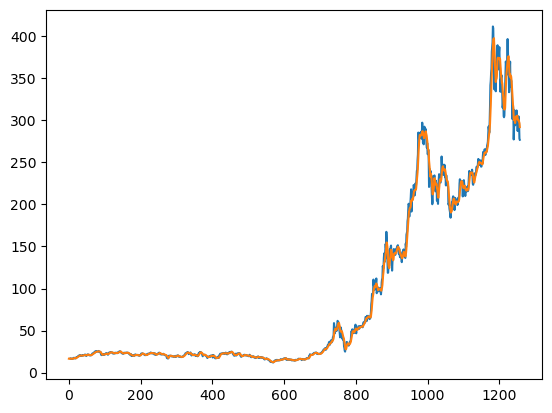

In [71]:
import matplotlib.pyplot as plt
plt.plot(x)
plt.plot(y)

In [72]:
y.plot()

<AxesSubplot:>

In [73]:
# different rolling 

df_tesla["10 days rolling"]=df_tesla['Open'].rolling(window=10,min_periods=1).mean()

In [74]:
df_tesla.head()

Date       Open       High        Low      Close  Adj Close  \
0  2017-02-27  16.544666  16.557333  16.134001  16.415333  16.415333   
1  2017-02-28  16.279333  16.733334  16.260000  16.666000  16.666000   
2  2017-03-01  16.945333  16.990000  16.607332  16.667999  16.667999   
3  2017-03-02  16.647333  16.885332  16.551332  16.698668  16.698668   
4  2017-03-03  16.716000  16.793333  16.600000  16.771334  16.771334   

      Volume  10 days rolling  
0  171912000        16.544666  
1   91171500        16.412000  
2   72142500        16.589777  
3   50277000        16.604166  
4   43791000        16.626533

In [75]:
df_tesla["30 days rolling"]=df_tesla['Open'].rolling(window=30,min_periods=1).mean()
df_tesla["50 days rolling"]=df_tesla['Open'].rolling(window=50,min_periods=1).mean()

In [76]:
df_tesla[["10 days rolling","30 days rolling","50 days rolling"]].plot(figsize=(15,6))

<AxesSubplot:>

Cumulative moving average

In [90]:
df_tesla["Open_ewm"]=df_tesla["Open"].ewm(span=3,min_periods=1).mean()
df_tesla[['Open',"Open_ewm"]][:100].plot(figsize=(12,6))

<AxesSubplot:>

<AxesSubplot:>

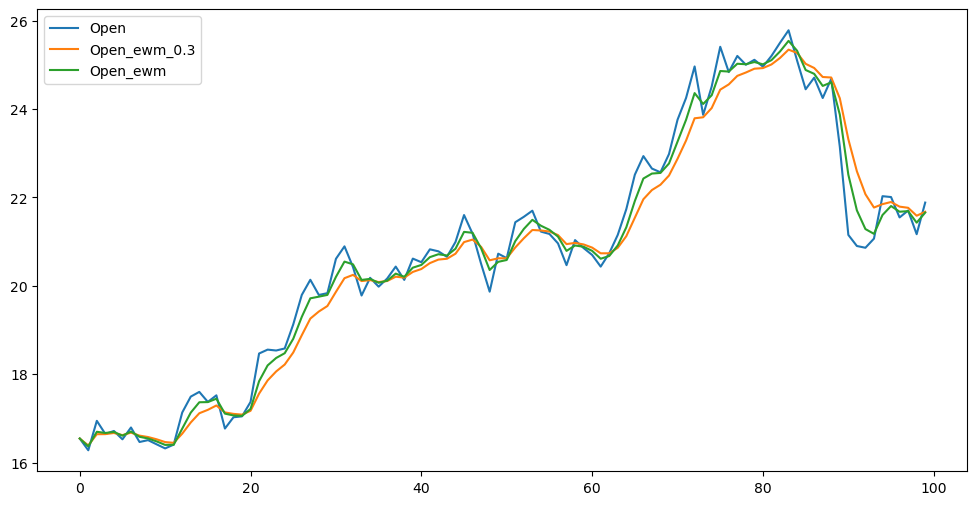

In [94]:
df_tesla["Open_ewm_0.3"]=df_tesla["Open"].ewm(alpha=0.3,min_periods=1).mean()
df_tesla[['Open',"Open_ewm_0.3","Open_ewm"]][:100].plot(figsize=(12,6))

In [95]:
df_tesla["Open_ewm_0.5"]=df_tesla["Open"].ewm(alpha=0.5,min_periods=1).mean()
df_tesla[['Open',"Open_ewm_0.5","Open_ewm_0.3"]][:100].plot(figsize=(12,6))

<AxesSubplot:>